Importing the necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Sinus rhythm - a "normal" heart rhythm

In [2]:
#Change H and gamma for sinus rhythm or arrhythmias
#gamma(HR) = 0.08804*HR - 0.06754
HR = 60
H = 3
gamma = 0.08804*HR - 0.06754

#coefficients for linear combination
alpha_1 = -0.024
alpha_2 = 0.0216
alpha_3 = -0.0012
alpha_4 = 0.12

#time vector
t = np.linspace(0, 10, 1000)

Sinus tachycardia - shape is "normal", but too fast

In [12]:
#Change H and gamma for sinus rhythm or arrhythmias
H = 2.848
gamma = 21

#coefficients for linear combination
alpha_1 = 0
alpha_2 = -0.1
alpha_3 = 0
alpha_4 = 0

#time vector
t = np.linspace(0, 3, 1000)

Atrial flutter

In [5]:
#Change H and gamma for sinus rhythm or arrhythmias
H = 1.52
gamma = 13

#coefficients for linear combination
alpha_1 = -0.068
alpha_2 = 0.028
alpha_3 = -0.024
alpha_4 = 0.12

#time vector
t = np.linspace(0, 11, 1000)

Ventricular tachycardia

In [19]:
#Change H and gamma for sinus rhythm or arrhythmias
H = 2.178
gamma = 21

#coefficients for linear combination
alpha_1 = 0
alpha_2 = 0
alpha_3 = 0
alpha_4 = -0.1

#time vector
t = np.linspace(0, 4.4, 1000)

Ventricular flutter

In [21]:
#Change H and gamma for sinus rhythm or arrhythmias
H = 2.178
gamma = 13

#coefficients for linear combination
alpha_1 = 0.1
alpha_2 = -0.02
alpha_3 = -0.01
alpha_4 = 0

#time vector
t = np.linspace(0, 6.5, 1000)

Solving the system of DE's

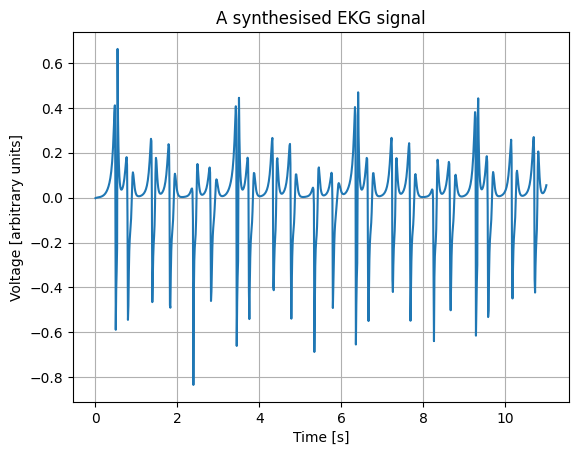

In [6]:
#rewriting the system so Python can understand it
def dSdt(t, S):
    global H
    global gamma

    #C and beta DO NOT CHANGE. System is stable for every C in [0,sqrt(2)]
    C = 1.35
    beta = 4

    x1, x2, x3, x4 = S
    return [gamma*(x1 - x2 - C*x1*x2 - x1*(x2**2)),
            gamma*(H*x1 - 3*x2 + C*x1*x2 + x1*(x2**2) + beta*(x4-x2)),
            gamma*(x3 - x4 - C*x3*x4 - x3*(x4**2)),
            gamma*(H*x3 - 3*x4 + C*x3*x4 + x3*(x4**2) + 2*beta*(x2-x4))]

#initial conditions
#stationary point is at 0,0,0,0 so we have to give it an initial "kick"
x1_0 = 0
x2_0 = 0
x3_0 = 0.1
x4_0 = 0

#initial condition vector
S_0 = (x1_0, x2_0, x3_0, x4_0)

#solving the ODE's
sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

#extracting the results
x1_sol = sol.T[0]
x2_sol = sol.T[1]
x3_sol = sol.T[2]
x4_sol = sol.T[3]

#the final solution
EKG = alpha_1*x1_sol + alpha_2*x2_sol + alpha_3*x3_sol + alpha_4*x4_sol

#wow pretty pictures :-)
#plt.plot(t, x1_sol)
#plt.plot(t, x2_sol)
#plt.plot(t, x3_sol)
#plt.plot(t, x4_sol)
plt.plot(t, EKG)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [arbitrary units]")
plt.title("A synthesised EKG signal")
plt.grid()
plt.show()
#plt.savefig("myECGplot.png")